In [112]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Define the directory containing the dataset
dataset_dir = r'C:\Users\ketha\Downloads\major\bottle dataset'

# Function to get dataset partitions
def get_dataset_partitions_tf(ds, train_split=0.75, val_split=0.125, test_split=0.125, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)

    return train_ds, val_ds, test_ds

# Load the dataset using tf.keras.preprocessing.image_dataset_from_directory
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(128, 128),  # Adjust the image size as needed
    validation_split=0.2,
    subset='training',
    seed=123
)

# Split the dataset into train, validation, and test sets
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

# Check the lengths of the train, validation, and test sets
print("Number of training samples:", len(train_ds))
print("Number of validation samples:", len(val_ds))
print("Number of test samples:", len(test_ds))

# Cache, shuffle, and prefetch the training, validation, and test datasets
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Define image resizing and rescaling pipeline
# Define image resizing and rescaling pipeline
# Define image resizing and rescaling pipeline
# Define image resizing and rescaling pipeline
# Define image resizing and rescaling pipeline
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256, 256),  # Resize to (256, 256)
    layers.experimental.preprocessing.Rescaling(1./255),
])

# Apply resizing and rescaling to the dataset
train_ds = train_ds.map(
    lambda x, y: (resize_and_rescale(x), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.map(
    lambda x, y: (resize_and_rescale(x), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.map(
    lambda x, y: (resize_and_rescale(x), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)


# Apply resizing and rescaling to the dataset


# Define data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

# Apply data augmentation to the training dataset
train_ds = train_ds.map(
    lambda x, y: (resize_and_rescale(x), y))

# Model Architecture
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3

# Adjust input shape definition
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# Build the model
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),  # Update input_shape here
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

# Compile the model (unchanged)
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


model.build(input_shape=input_shape)
model.summary()


Found 486 files belonging to 3 classes.
Using 389 files for training.
Number of training samples: 9
Number of validation samples: 1
Number of test samples: 3
Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_152 (Conv2D)         (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_151 (MaxPool  (None, 127, 127, 32)      0         
 ing2D)                                                          
                                                                 
 conv2d_153 (Conv2D)         (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_152 (MaxPool  (None, 62, 62, 64)        0         
 ing2D)                                                          
                                                                 
 conv2d_154 (Conv2D)       

In [113]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50
)


Epoch 1/50
9/9 [==============================] - 15s 1s/step - loss: 0.9417 - accuracy: 0.6322 - val_loss: 7.2136 - val_accuracy: 0.5938
Epoch 2/50
9/9 [==============================] - 8s 968ms/step - loss: 0.8678 - accuracy: 0.6437 - val_loss: 8.7640 - val_accuracy: 0.5938
Epoch 3/50
9/9 [==============================] - 8s 861ms/step - loss: 0.8600 - accuracy: 0.6437 - val_loss: 3.9702 - val_accuracy: 0.5938
Epoch 4/50
9/9 [==============================] - 8s 871ms/step - loss: 0.8420 - accuracy: 0.6437 - val_loss: 7.3415 - val_accuracy: 0.5938
Epoch 5/50
9/9 [==============================] - 8s 965ms/step - loss: 0.8381 - accuracy: 0.6437 - val_loss: 7.0164 - val_accuracy: 0.5938
Epoch 6/50
9/9 [==============================] - 8s 859ms/step - loss: 0.8386 - accuracy: 0.6437 - val_loss: 9.2157 - val_accuracy: 0.5938
Epoch 7/50
9/9 [==============================] - 8s 872ms/step - loss: 0.8349 - accuracy: 0.6437 - val_loss: 9.9341 - val_accuracy: 0.5938
Epoch 8/50
9/9 [======

In [114]:
def predict(model, img, class_names):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions)]
    confidence = round(100 * np.max(predictions), 2)
    return predicted_class, confidence

In [115]:
import os

# Define the directory containing the dataset
dataset_dir = r'C:\Users\ketha\Downloads\major\bottle dataset'

# Get the class names from the subdirectories in the dataset directory
class_names = sorted(os.listdir(dataset_dir))

print("Class names:", class_names)

Class names: ['Full  Water level', 'Half water level', 'Overflowing']


1/1 [==============================] - 0s 61ms/step


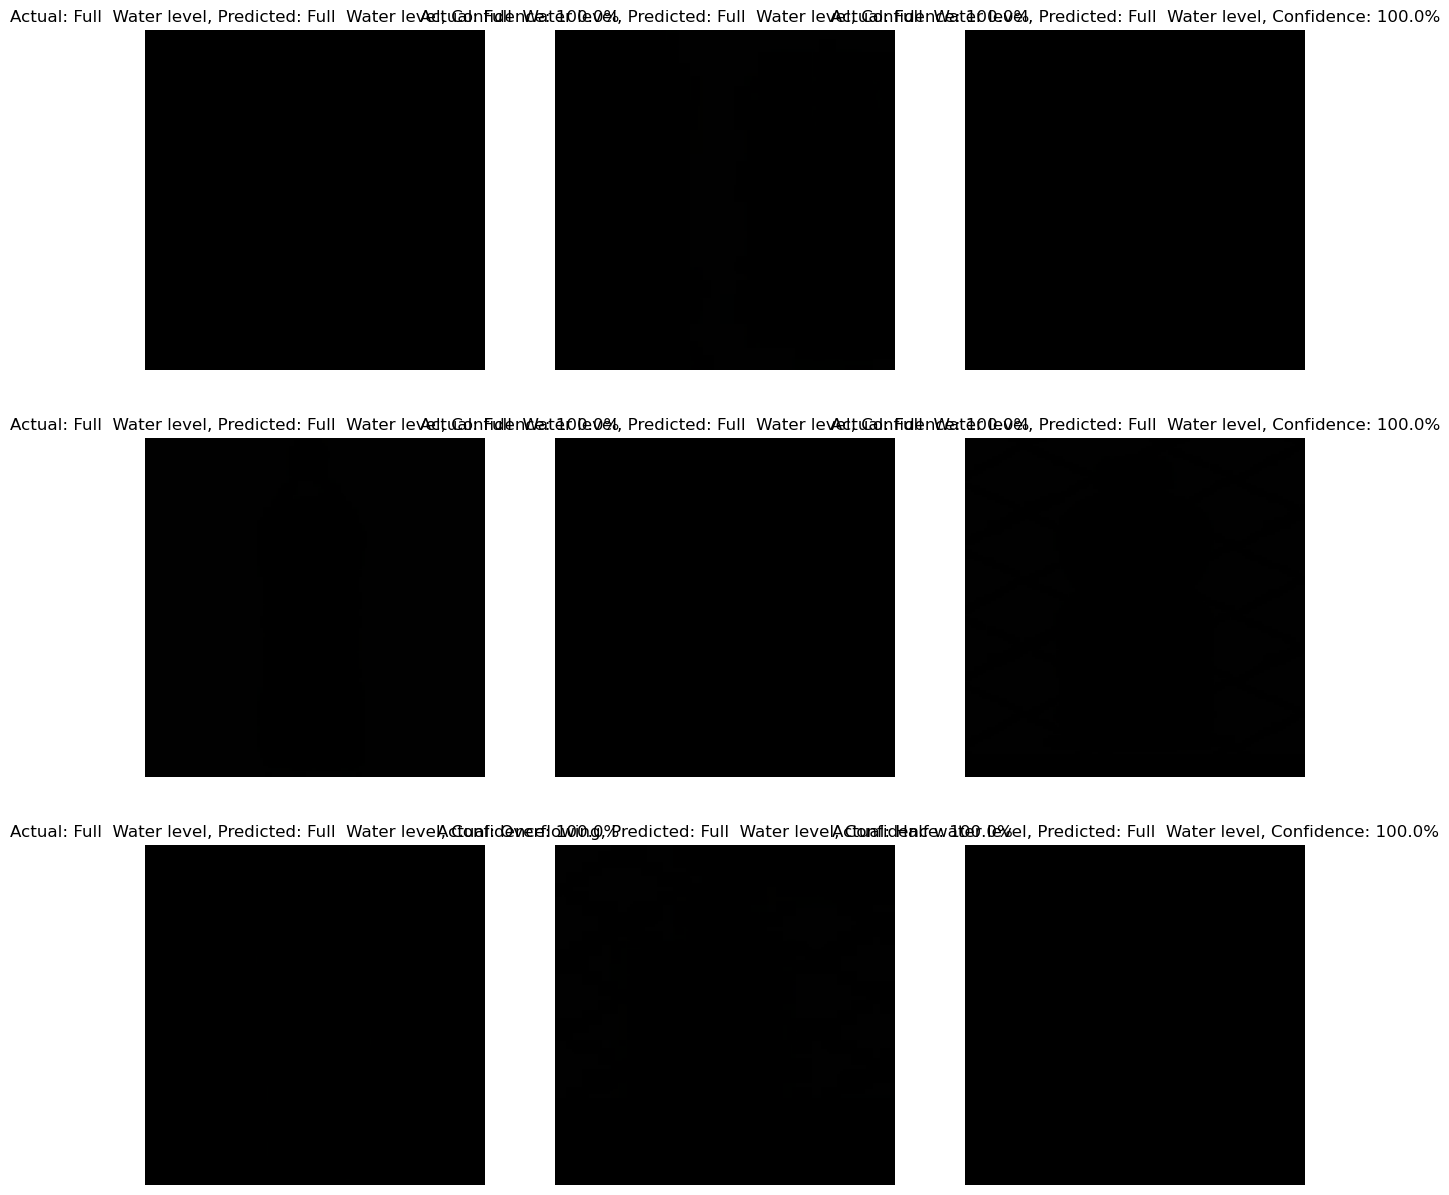

In [116]:
class_names: ['Full  Water level', 'Half water level', 'Overflowing']
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype(np.uint8))

        predicted_class, confidence = predict(model, images[i], class_names)
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, Predicted: {predicted_class}, Confidence: {confidence}%")
        plt.axis('off')

plt.show()

In [117]:
model.save('CNN.h5')